In [100]:
import warnings
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn import metrics 
import matplotlib.pyplot as plt
import pandas as pd
warnings.simplefilter('ignore')

In [101]:
go_sales_connect = sqlite3.connect('go_sales.sqlite')

In [102]:
df = pd.read_sql_query("SELECT RETURN_REASON_CODE, RETURN_QUANTITY, UNIT_PRICE, PRODUCT_NUMBER from returned_item join order_details on returned_item.ORDER_DETAIL_CODE = order_details.ORDER_DETAIL_CODE", go_sales_connect)
df

,RETURN_REASON_CODE,RETURN_QUANTITY,UNIT_PRICE,PRODUCT_NUMBER
0,5,8,123.56,6
1,2,2,151.77,8
2,4,22,134.63,8
3,3,20,134.63,8
4,1,2,90.09,17
...,...,...,...,...
701,3,24,92.91,66
702,5,66,90.76,71
703,4,64,11.98,73
704,1,2,346.66,44


In [103]:
X = df.drop('RETURN_REASON_CODE', axis = 1)
y = df.loc[:, ['RETURN_REASON_CODE']]

In [104]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.15,
    random_state = 42
)
y_test

,RETURN_REASON_CODE
478,2
81,1
77,1
208,4
319,5
...,...
296,1
30,2
69,1
507,1


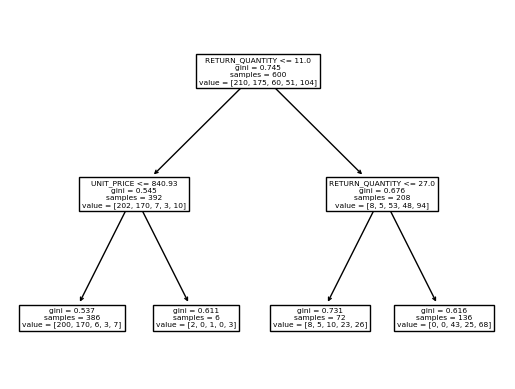

In [105]:
dtree = DecisionTreeClassifier(max_depth = 2)
dtree = dtree.fit(X_train, y_train)
tree.plot_tree(dtree, feature_names= X.columns)
plt.show()

In [106]:
predicted_df = pd.DataFrame(dtree.predict(X_test))
predicted_df = predicted_df.rename(columns={0 : 'predicted reason'})
model_results_frame = pd.concat([y_test.reset_index()['RETURN_REASON_CODE'],predicted_df], axis= 1)
model_results_frame

,RETURN_REASON_CODE,predicted reason
0,2,1
1,1,1
2,1,1
3,4,5
4,5,1
...,...,...
101,1,1
102,2,1
103,1,1
104,1,1


<function matplotlib.pyplot.show(close=None, block=None)>

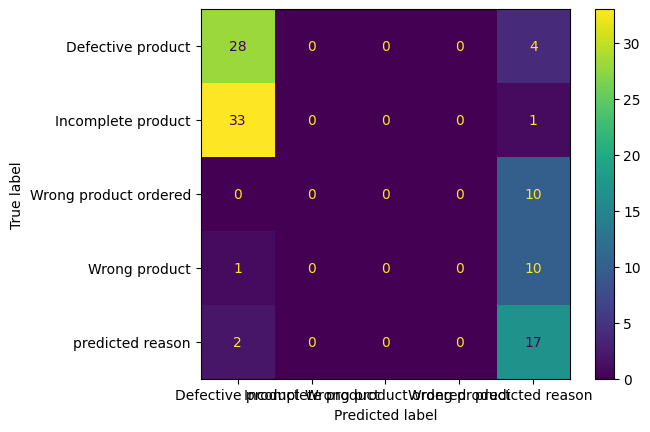

In [107]:
confusion_matrix = metrics.confusion_matrix(model_results_frame['RETURN_REASON_CODE'], model_results_frame['predicted reason'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix, display_labels= ['Defective product', 'Incomplete product', 'Wrong product ordered', 'Wrong product', 'predicted reason'])
cm_display.plot()
plt.show

In [108]:
metrics.accuracy_score(model_results_frame['RETURN_REASON_CODE'], model_results_frame['predicted reason'])

0.42452830188679247

In [109]:
# dtree = DecisionTreeClassifier()
# dtree = dtree.fit(X_train, y_train)
# tree.plot_tree(dtree, feature_names= X.columns)
# plt.show()